In [14]:
!pip install elasticsearch

In [15]:
# make sure ES is up and running
import requests
res = requests.get('http://localhost:9200')
print(res.content)

b'{\n  "name" : "elasticsearch",\n  "cluster_name" : "docker-cluster",\n  "cluster_uuid" : "G58RLEzPTIOptWuMn1FPAw",\n  "version" : {\n    "number" : "7.13.2",\n    "build_flavor" : "default",\n    "build_type" : "docker",\n    "build_hash" : "4d960a0733be83dd2543ca018aa4ddc42e956800",\n    "build_date" : "2021-06-10T21:01:55.251515791Z",\n    "build_snapshot" : false,\n    "lucene_version" : "8.8.2",\n    "minimum_wire_compatibility_version" : "6.8.0",\n    "minimum_index_compatibility_version" : "6.0.0-beta1"\n  },\n  "tagline" : "You Know, for Search"\n}\n'


In [16]:
# connect to our cluster
from elasticsearch import Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port': 9200}])

In [25]:
# make our search
res = es.search(index="iexselection", body={"query": {"match_all": {}}}, size = 1000)

C:\Users\papon\anaconda3\lib\site-packages\elasticsearch\connection\base.py:208: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.13/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)


In [26]:
print("Got %d Hits:" % res['hits']['total']['value'])

Got 4371 Hits:


In [27]:
for hit in res['hits']['hits']:
    print( hit["_source"])

{'symbol': 'AMZN', 'latestPrice': 3399.9, 'companyName': 'Amazon.com Inc.', 'change': -103.19, 'lastTradeTime': 1711902580873}
{'symbol': 'TWTR', 'latestPrice': 63.44, 'companyName': 'Twitter Inc', 'change': -3.31, 'lastTradeTime': 1680051071335}
{'symbol': 'MSFT', 'latestPrice': 312.05, 'companyName': 'Microsoft Corporation', 'change': -1.7, 'lastTradeTime': 1671935691127}
{'symbol': 'MSFT', 'latestPrice': 310.81, 'companyName': 'Microsoft Corporation', 'change': -1.6, 'lastTradeTime': 1676128624694}
{'symbol': 'AAPL', 'latestPrice': 155.23, 'companyName': 'Apple Inc', 'change': -0.82, 'lastTradeTime': 1698339091102}
{'symbol': 'AMZN', 'latestPrice': 3353.49, 'companyName': 'Amazon.com Inc.', 'change': -101.7, 'lastTradeTime': 1649381925634}
{'symbol': 'TWTR', 'latestPrice': 63.49, 'companyName': 'Twitter Inc', 'change': -3.27, 'lastTradeTime': 1687046923179}
{'symbol': 'AMZN', 'latestPrice': 3425.69, 'companyName': 'Amazon.com Inc.', 'change': -101.58, 'lastTradeTime': 1642192598525}

In [28]:
for hit in res['hits']['hits']:
    print("%(companyName)s %(lastTradeTime)s: %(latestPrice)s" % hit["_source"])

Amazon.com Inc. 1711902580873: 3399.9
Twitter Inc 1680051071335: 63.44
Microsoft Corporation 1671935691127: 312.05
Microsoft Corporation 1676128624694: 310.81
Apple Inc 1698339091102: 155.23
Amazon.com Inc. 1649381925634: 3353.49
Twitter Inc 1687046923179: 63.49
Amazon.com Inc. 1642192598525: 3425.69
Apple Inc 1686213473561: 149.31
Twitter Inc 1646628498102: 62.57
Microsoft Corporation 1702053814035: 313.08
Microsoft Corporation 1676942418594: 320.3
Apple Inc 1685077431181: 150.48
Apple Inc 1685223000730: 150.25
Amazon.com Inc. 1714383722784: 3494.23
Twitter Inc 1713808127820: 64.64
Microsoft Corporation 1649880853306: 312.95
Apple Inc 1679620188228: 150.48
Amazon.com Inc. 1655780705174: 3441.27
Twitter Inc 1686992121363: 65.15
Microsoft Corporation 1714792246839: 324.07
Apple Inc 1647081427551: 149.51
Amazon.com Inc. 1713998524484: 3344.88
Twitter Inc 1660486799507: 63.76
Microsoft Corporation 1679594863224: 316.32
Amazon.com Inc. 1713632161606: 3499.15
Apple Inc 1647314857245: 153.9


In [29]:
from pandas import json_normalize
df = json_normalize(res['hits']['hits'])

# show columns & types
df.dtypes

_index                    object
_type                     object
_id                       object
_score                   float64
_source.symbol            object
_source.latestPrice      float64
_source.companyName       object
_source.change           float64
_source.lastTradeTime      int64
dtype: object

In [30]:
#show data
df

,_index,_type,_id,_score,_source.symbol,_source.latestPrice,_source.companyName,_source.change,_source.lastTradeTime
0,iexselection,_doc,iexselection+0+19,1.0,AMZN,3399.90,Amazon.com Inc.,-103.19,1711902580873
1,iexselection,_doc,iexselection+0+12,1.0,TWTR,63.44,Twitter Inc,-3.31,1680051071335
2,iexselection,_doc,iexselection+0+5,1.0,MSFT,312.05,Microsoft Corporation,-1.70,1671935691127
3,iexselection,_doc,iexselection+0+21,1.0,MSFT,310.81,Microsoft Corporation,-1.60,1676128624694
4,iexselection,_doc,iexselection+0+14,1.0,AAPL,155.23,Apple Inc,-0.82,1698339091102
...,...,...,...,...,...,...,...,...,...
995,iexselection,_doc,iexselection+0+1063,1.0,AMZN,3375.64,Amazon.com Inc.,-102.79,1650391195230
996,iexselection,_doc,iexselection+0+1030,1.0,TWTR,62.54,Twitter Inc,-3.23,1661865751651
997,iexselection,_doc,iexselection+0+1072,1.0,AAPL,152.83,Apple Inc,-0.80,1680820818697
998,iexselection,_doc,iexselection+0+1067,1.0,AMZN,3398.67,Amazon.com Inc.,-104.28,1680365455482


Plotting prices evolution for Twitter:

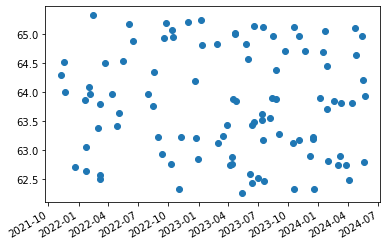

In [31]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import time

df2 = df[ (df['_source.companyName']=='Twitter Inc')]

order = np.argsort(df2['_source.lastTradeTime'][:100])

x = np.array(df2['_source.lastTradeTime'][:100].apply(lambda x : (datetime.fromtimestamp(x/1000))))[order]
y = np.array(df2['_source.latestPrice'][:100])[order]
                                      
plt.scatter(x,y)

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [32]:
import pandas as pd

dfML = pd.DataFrame(y,x, columns = ["price"])
dfML

,price
2021-11-07 01:58:53.495,64.30
2021-11-17 08:43:07.123,64.52
2021-11-20 23:27:38.076,64.01
2021-12-21 06:52:39.194,62.71
2022-01-19 17:07:53.171,63.87
...,...
2024-04-22 19:48:47.820,64.64
2024-05-12 16:48:06.053,64.97
2024-05-14 21:45:33.830,64.21
2024-05-19 09:27:28.095,62.80


In [33]:
dfML.describe()

,price
count,100.00000
mean,63.79700
std,0.90842
min,62.26000
25%,63.02250
50%,63.81500
75%,64.65250
max,65.33000


<AxesSubplot:>

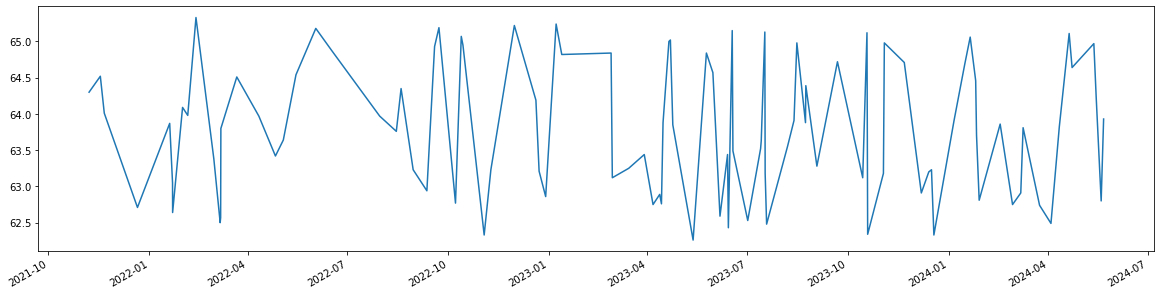

In [34]:
dfML.price.plot(figsize = (20,5))